#### Gender-Career IAT Cleaning

In [202]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import glob
import seaborn as sns

sns.set_theme(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


In [1011]:
%matplotlib inline

In [203]:
df_lst = []
files = glob.glob("data/gender_career_data/Gender*.sav")

for f in files:
    data = pd.read_spss(f)
    df_lst.append(data)

all_data = pd.concat(df_lst)    


In [204]:
all_data.count()

session_id        3159286
session_status    3159286
study_name        3159286
date              3159286
month             3159286
                   ...   
sius008             30789
sius009             30778
sius010             30772
sius011             30777
sius012             30762
Length: 192, dtype: int64

#### Removing Irrelevant / Incomplete Data 

In [205]:
to_drop = ['num_childunder18', 
           'actualduties', 
           'idealduties', 
           'primary1', 
           'num_primary1a', 
           'secondary1', 
           'num_secondary1a', 
           'surnameused', 
           'iatevaluations001', 
           'iatevaluations002', 
           'iatevaluations003', 
           'broughtwebsite', 
           'user_id', 
           'previous_session_id', 
           'previous_session_schema', 
           'numboys', 
           'numgirls', 
           'planchildren', 
           'childunder18', 
           'primary1a', 
           'primary1aa', 
           'secondary1a', 
           'secondary1aa', 
           'q2a',
           'q2b',
           'q2c',
           'q2d',
           'q3a',
           'q3b',
           'q3c',
           'q4',
           'femaleceos',
           'femalepres',
           'femalepres_2006',
           'femalepres_2007', 'hillary.hillary1',
           'hillary.hillary2',
           'hillary.hillary3',
           'hillary.hillary4',
           'hillary.hillary5',
           'hillary.hillary6',
           'hillary.hillary7',
           'hillary.hillary8',
           'hillary.hillary9',
           'hillary.hillary10','hillarycomp',
           'hillarytherm',
           'hillaryvote',
           'deathanxiety001',
           'deathanxiety002',
           'deathanxiety003',
           'deathanxiety004',
           'deathanxiety005',
           'deathanxiety006',
           'deathanxiety007',
           'deathanxiety008',
           'deathanxiety009',
           'deathanxiety010',
           'deathanxiety011',
           'deathanxiety012',
           'deathanxiety013',
           'deathanxiety014',
           'deathanxiety015',
           'fearcovid001',
           'fearcovid002',
           'fearcovid003',
           'fearcovid004',
           'fearcovid005',
           'fearcovid006',
           'fearcovid007',
           'fearcovid008',
           'pvd001',
           'pvd002',
           'pvd003',
           'pvd004',
           'pvd005',
           'pvd006',
           'pvd007',
           'pvd008',
           'pvd009',
           'pvd010',
           'pvd011',
           'pvd012',
           'pvd013',
           'pvd014',
           'pvd015',
           'sius001',
           'sius002',
           'sius003',
           'sius004',
           'sius005',
           'sius006',
           'sius007',
           'sius008',
           'sius009',
           'sius010',
           'sius011',
           'sius012', 
           'Order', 'Side_Career_34', 'Side_Male_34', 
           'D_biep.Male_Career_36', 'D_biep.Male_Career_47', 'Mn_RT_all_3',
           'Mn_RT_all_4', 'Mn_RT_all_6', 'Mn_RT_all_7', 'SD_all_3', 'SD_all_4', 
           'SD_all_6', 'SD_all_7', 'N_3', 'N_4', 'N_5', 'N_6', 'N_7', 
           'Mn_RT_correct_3', 'Mn_RT_correct_4', 'Mn_RT_correct_6', 
           'Mn_RT_correct_7', 'SD_correct_3', 'SD_correct_4', 'SD_correct_6', 
           'SD_correct_7', 'N_ERROR_3', 'N_ERROR_4', 'N_ERROR_6', 'N_ERROR_7']

In [206]:
removing_columns1 = all_data.drop(to_drop, axis=1)

In [207]:
comp1 = removing_columns1[removing_columns1['session_status']=='C']

In [220]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 64 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   session_id              1468590 non-null  float64 
 1   session_status          1468590 non-null  object  
 2   study_name              1468590 non-null  object  
 3   date                    1468590 non-null  float64 
 4   month                   1468590 non-null  float64 
 5   day                     1468590 non-null  float64 
 6   year                    1468590 non-null  float64 
 7   hour                    1468590 non-null  float64 
 8   weekday                 1468590 non-null  float64 
 9   birthmonth              781589 non-null   float64 
 10  birthyear               759174 non-null   float64 
 11  num_002                 784439 non-null   object  
 12  birthSex                561349 non-null   float64 
 13  genderIdentity          588084 non-null   ob

In [208]:
comp1.to_csv('data/comp1.csv')

In [209]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = (p.get_x() + p.get_width() / 2)
                _y = (p.get_y() + p.get_height()) + 3_000
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
# Source: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

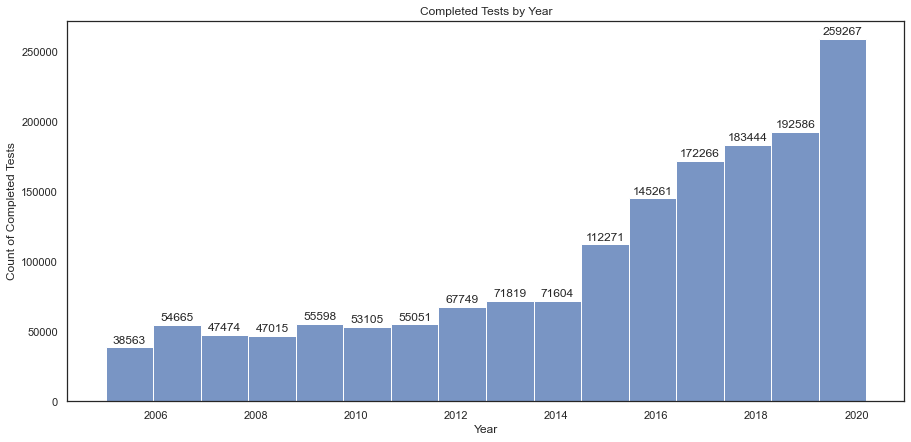

In [210]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

### Remove High Error Rates

Remove participants with high rates of error (more than 30%) or with too many fast trials (more than 10%)
 
"As is typical in IAT research, sessions were excluded if they had one of the following: (a) overall error rates above 30% (PCT_error_3467 > 30), or (b) more than 10% of trials with latency less than 300 ms (Greenwald, Nosek, & Banaji, 2003)." source = https://journals.sagepub.com/doi/full/10.1177/0146167218757454


IF  (pct_300>10 OR PCT_error_3467>30) Error='Yes'.

2.65% of tests were removed due to error. 

In [218]:
comp1.drop(comp1.index[comp1['PCT_error_3467'] >30], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
(comp_tests_n - comp1_after_errors_removed) / comp_tests_n * 100

2.644319211603211

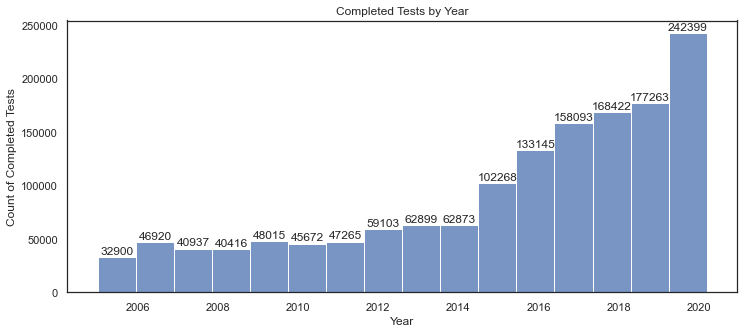

In [226]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

### Fix Education Columns & Combine 


In [227]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 64 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   session_id              1468590 non-null  float64 
 1   session_status          1468590 non-null  object  
 2   study_name              1468590 non-null  object  
 3   date                    1468590 non-null  float64 
 4   month                   1468590 non-null  float64 
 5   day                     1468590 non-null  float64 
 6   year                    1468590 non-null  float64 
 7   hour                    1468590 non-null  float64 
 8   weekday                 1468590 non-null  float64 
 9   birthmonth              781589 non-null   float64 
 10  birthyear               759174 non-null   float64 
 11  num_002                 784439 non-null   object  
 12  birthSex                561349 non-null   float64 
 13  genderIdentity          588084 non-null   ob

In [229]:
comp1.loc[:, 'edu_14'].fillna(comp1.edu_13, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [230]:
comp1.replace({'M.B.A.':'other advanced degree'}, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [231]:
comp1[['edu', 'edu_14', 'edu_13']].to_csv('data/edu.csv')

In [232]:
comp1.drop(labels='edu_13', inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [235]:
comp1.edu_14.replace(to_replace={"elementary school": 1, "junior high": 2, "some high school": 3, "high school graduate": 4, 
                                 "some college": 5, "associate's degree": 6, "bachelor's degree": 7, "some graduate school": 8, 
                                 "master's degree": 9, "J.D.": 10, "M.D.": 11, "Ph.D.": 12, "other advanced degree": 13, "M.B.A.": 13}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [245]:
comp1.edu_14.value_counts()

5.0     320647
7.0     294430
9.0     170868
4.0     103672
3.0      96245
8.0      90945
6.0      89448
13.0     60057
12.0     46531
10.0     25443
11.0     16455
2.0      12540
1.0       2300
Name: edu_14, dtype: int64

In [238]:
comp1.drop(columns='edu', inplace=True)

In [240]:
comp1.edu_14.replace(to_replace={-999.0: np.nan}, inplace=True)

In [244]:
comp1.edu_14.isna().sum()

139009

In [246]:
comp1[['edu_14', 'year']].to_csv('data/edu_14.csv')

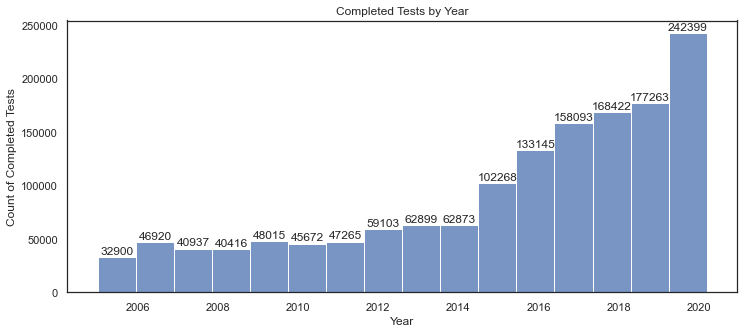

In [247]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [248]:
comp1.to_csv('data/comp_err_edu.csv')

### Renaming & Cleaning up Some More Columns

In [249]:
comp2 = comp1.rename(columns={'D_biep.Male_Career_all': 'Implicit Measure'})

In [250]:
comp2.drop(columns=['Mn_RT_all_3467', 'N_3467', 'PCT_error_3467', 'pct_300', 'pct_400', 'pct_2K', 'pct_3K', 'pct_4K'], inplace=True, axis=1)

In [251]:
comp2.drop(columns=['birthmonth', 'num_002', 'major'], inplace=True, axis=1)

### Occupation Fixes

In [258]:
comp2.pivot_table(index='year', columns=['occuself'], values='session_id', aggfunc='count')

occuself,,-999,.,Administrative Support,Arts/Design/Entertainment/Sports,Business,Computer/Math,Construction/Extraction,Education,Engineers/Architects,...,Military,Production,Protective Service,Repair/Installation,Sales,Science,Service and Personal Care,Social Service,Transportation,Unemployed
year,,,,,,,,,,,,,,,,,,,,,
2016.0,47953,11252,933,3534,2564,7664,3151,370,8973,3127,...,672,519,559,155,4615,2571,1023,1973,318,9108
2017.0,354,21321,122,6754,4623,15898,5619,628,16645,5808,...,1221,885,1292,284,8093,4468,1909,3629,624,17201


In [259]:
comp2.pivot_table(index='year', columns=['occuSelf'], values='session_id', aggfunc='count')

occuSelf,,.,Administrative Support,Arts/Design/Entertainment/Sports,Business,Computer/Math,Construction/Extraction,Education,Engineers/Architects,"Farming, Fishing, Forestry",...,Military,Production,Protective Service,Repair/Installation,Sales,Science,Service and Personal Care,Social Service,Transportation,Unemployed
year,,,,,,,,,,,,,,,,,,,,,
2018.0,128.0,23576.0,7245.0,4108.0,16795.0,6219.0,767.0,17801.0,6202.0,640.0,...,1392.0,1056.0,1176.0,409.0,8987.0,3915.0,2091.0,3923.0,852.0,18533.0
2019.0,25742.0,NaN,7859.0,4332.0,16013.0,6032.0,889.0,20101.0,6654.0,601.0,...,1966.0,1048.0,1093.0,404.0,8823.0,4122.0,2354.0,4466.0,828.0,19977.0
2020.0,34641.0,NaN,10340.0,6442.0,23445.0,8442.0,1326.0,26364.0,8875.0,942.0,...,2979.0,1581.0,1349.0,495.0,13040.0,6182.0,2867.0,6251.0,1280.0,25963.0


In [260]:
occuself_list = comp2['occuself'].unique()
occuself_list

array([nan, '-999', 'Legal', 'Social Service', 'Education', 'Management',
       'Arts/Design/Entertainment/Sports', 'Computer/Math', 'Unemployed',
       'Business', 'Administrative Support', 'Healthcare', 'Food service',
       'Sales', 'Construction/Extraction', 'Engineers/Architects',
       'Military', 'Protective Service', 'Maintenance', 'Science',
       'Production', 'Farming, Fishing, Forestry',
       'Service and Personal Care', 'Homemaker or Parenting',
       'Transportation', 'Repair/Installation', '.', ''], dtype=object)

In [261]:
occuSelf_list = comp2['occuSelf'].unique()
occuSelf_list

array(['.', 'Food service', 'Unemployed', 'Engineers/Architects',
       'Education', 'Sales', 'Healthcare', 'Computer/Math', 'Business',
       'Management', 'Social Service', 'Science',
       'Arts/Design/Entertainment/Sports', 'Legal',
       'Homemaker or Parenting', 'Administrative Support',
       'Service and Personal Care', 'Construction/Extraction',
       'Maintenance', 'Transportation', 'Military', 'Production',
       'Protective Service', '', 'Repair/Installation',
       'Farming, Fishing, Forestry', nan], dtype=object)

In [262]:
occupation_lst = comp2['occupation'].unique()
comp2[['occu_bp', 'occu_detail_bp']] = comp2.occupation.str.split(pat=' - ', expand=True)

In [263]:
comp2.replace({'.': np.nan, '': np.nan, 'nan': np.nan, 'null': np.nan, 'Nov-00': np.nan}, inplace = True)

In [264]:
comp2.replace({'-999': np.nan}, inplace = True)

In [266]:
comp2.occuself.isna().sum()

1259287

In [267]:
comp2[['occu_bp', 'occu_detail_bp', 'occuself', 'occuSelf', 'occuselfdetail', 'occuSelfDetail']].to_csv('data/comp2.csv')

In [269]:
comp2.occu_bp.replace({'Protective Services': 'Protective Service'}, inplace=True)
comp2.occu_bp.replace({'Protective services': 'Protective Service'}, inplace=True)

In [270]:
comp2.loc[comp2['occu_detail_bp'] == 'Student', 'occu_bp'] = 'Student'


In [271]:
comp2.occu_bp.count(), comp2.occu_bp.unique(), len(comp2.occu_bp.unique())

(492187,
 array([nan, 'Healthcare', 'Computer/Math', 'Legal', 'Management',
        'Education', 'Student', 'Business', 'Unemployed', 'Food Service',
        'Administrative Support', 'Arts/Design/Entertainment/Sports',
        'Homemaker or Parenting', 'Sales', 'Engineers/Architects',
        'Construction/Extraction', 'Retired', 'Service and Personal Care',
        'Social Service', 'Production', 'Science', 'Protective Service',
        'Farming, Fishing, Forestry', 'Repair/Installation', 'Military',
        'Maintenance', 'Transportation'], dtype=object),
 27)

In [272]:
comp2.occuSelf.count(), comp2.occuSelf.unique(), len(comp2.occuSelf.unique())

(503997,
 array([nan, 'Food service', 'Unemployed', 'Engineers/Architects',
        'Education', 'Sales', 'Healthcare', 'Computer/Math', 'Business',
        'Management', 'Social Service', 'Science',
        'Arts/Design/Entertainment/Sports', 'Legal',
        'Homemaker or Parenting', 'Administrative Support',
        'Service and Personal Care', 'Construction/Extraction',
        'Maintenance', 'Transportation', 'Military', 'Production',
        'Protective Service', 'Repair/Installation',
        'Farming, Fishing, Forestry'], dtype=object),
 25)

In [273]:
comp2.occuself.count(), comp2.occuself.unique(), len(comp2.occuself.unique())

(209303,
 array([nan, 'Legal', 'Social Service', 'Education', 'Management',
        'Arts/Design/Entertainment/Sports', 'Computer/Math', 'Unemployed',
        'Business', 'Administrative Support', 'Healthcare', 'Food service',
        'Sales', 'Construction/Extraction', 'Engineers/Architects',
        'Military', 'Protective Service', 'Maintenance', 'Science',
        'Production', 'Farming, Fishing, Forestry',
        'Service and Personal Care', 'Homemaker or Parenting',
        'Transportation', 'Repair/Installation'], dtype=object),
 25)

In [274]:
comp2.loc[:, 'occu_bp'].fillna(comp2.occuSelf, inplace=True)

In [275]:
comp2.loc[:, 'occu_bp'].fillna(comp2.occuself, inplace=True)

In [276]:
len(comp2.occu_bp)

1468590

In [277]:
comp3 = comp2.drop(columns=['occu_detail_bp', 'occuSelf', 'occuself', 'occupation'], axis=1).copy()

In [278]:
occu = comp3.drop(columns=['occuselfdetail', 'occuSelfDetail'], axis=1).copy()

In [580]:
occu.to_csv('data/occu.csv')

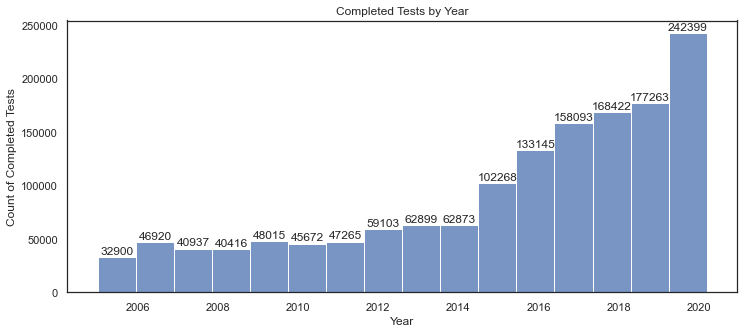

In [281]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(occu.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

### Birth Sex & Gender Identity Fixes

In [637]:
sex = occu.copy()
sex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 47 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1468590 non-null  float64 
 1   session_status    1468590 non-null  object  
 2   study_name        1468590 non-null  object  
 3   date              1468590 non-null  float64 
 4   month             1468590 non-null  float64 
 5   day               1468590 non-null  float64 
 6   year              1468590 non-null  float64 
 7   hour              1468590 non-null  float64 
 8   weekday           1468590 non-null  float64 
 9   birthyear         759174 non-null   float64 
 10  birthSex          561349 non-null   float64 
 11  genderIdentity    561349 non-null   object  
 12  ethnicityomb      1238710 non-null  object  
 13  raceomb_002       720451 non-null   object  
 14  raceombmulti      37009 non-null    object  
 15  Implicit Measure  1442690 non-null

In [638]:
sex.pivot_table(values=['sex', 'birthsex', 'birthSex'], columns='year', dropna=False, aggfunc='count')

year,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
birthSex,0,0,0,0,0,0,0,0,0,0,0,0,0,160429,168969,231951
birthsex,0,0,0,0,0,0,0,0,0,0,0,81549,151039,0,0,0
sex,26055,39167,36817,36486,43066,41022,43079,53984,57263,57447,94885,43769,0,0,0,0


In [639]:
sex.pivot_table(values=['sex', 'birthsex', 'birthSex'], columns='year', dropna=True, aggfunc='count')

year,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
birthSex,0,0,0,0,0,0,0,0,0,0,0,0,0,160429,168969,231951
birthsex,0,0,0,0,0,0,0,0,0,0,0,81549,151039,0,0,0
sex,26055,39167,36817,36486,43066,41022,43079,53984,57263,57447,94885,43769,0,0,0,0


In [640]:
sex.groupby(by=["birthSex"], dropna=False).count()

,session_id,session_status,study_name,date,month,day,year,hour,weekday,birthyear,...,countryres,raceomb,politicalid,religion2009,ethnic,politicalid_6,religion,birthsex,genderidentity,occu_bp
birthSex,,,,,,,,,,,,,,,,,,,,,
1.0,179783,179783,179783,179783,179783,179783,179783,179783,179783,171805,...,0,0,0,0,0,0,0,0,0,163155
2.0,381566,381566,381566,381566,381566,381566,381566,381566,381566,362755,...,0,0,0,0,0,0,0,0,0,339908
NaN,907241,907241,907241,907241,907241,907241,907241,907241,907241,224614,...,643679,587475,636054,406879,54749,50381,91270,232588,232589,702424


In [641]:
sex.loc[:, 'sex'].fillna(sex.birthSex, inplace=True)
sex.loc[:, 'sex'].fillna(sex.birthsex, inplace=True)

In [642]:
sex[['birthsex', 'birthSex', 'sex']].to_csv('data/sex_df.csv')

In [643]:
sex_dict = {np.nan: 'Not Reported', 'NaN': 'Not Reported', '': 'Not Reported', 1.0: 'Male', 2.0: 'Female'}
sex.sex.replace(to_replace=sex_dict, inplace=True)

In [644]:
sex.sex.value_counts()

Female          937525
Male            429452
Not Reported    101613
Name: sex, dtype: int64

In [648]:
# 98% of the tests gender identity was same as birthsex

In [649]:
sex.drop(columns=['birthSex', 'birthsex', 'genderIdentity', 'genderidentity'], inplace=True)

In [651]:
sex.loc[:, 'sex'].isna().sum(axis=0)

0

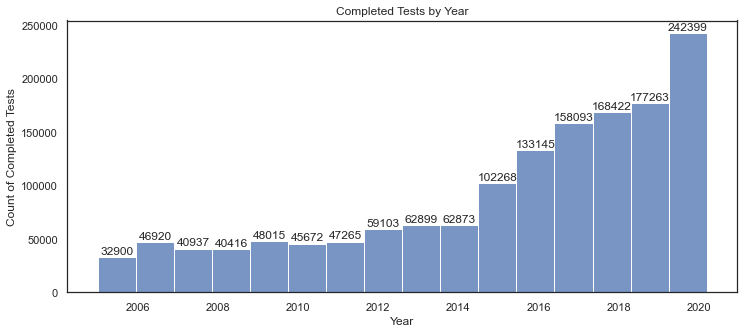

In [652]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(sex.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [653]:
sex.sex.value_counts()

Female          937525
Male            429452
Not Reported    101613
Name: sex, dtype: int64

In [654]:
sex.groupby('sex').count()

,session_id,session_status,study_name,date,month,day,year,hour,weekday,birthyear,...,havechildren,countrycit,countryres,raceomb,politicalid,religion2009,ethnic,politicalid_6,religion,occu_bp
sex,,,,,,,,,,,,,,,,,,,,,
Female,937525,937525,937525,937525,937525,937525,937525,937525,937525,510460,...,392304,444915,444095,404243,437657,279030,39336,35968,65999,818435
Male,429452,429452,429452,429452,429452,429452,429452,429452,429452,247313,...,166584,194616,194132,178586,193140,124641,15026,14037,24815,382154
Not Reported,101613,101613,101613,101613,101613,101613,101613,101613,101613,1401,...,12176,5477,5452,4646,5257,3208,387,376,456,4898


### Now to fix Ethnicity & Race... 

In [367]:
sex.to_csv('data/after_sex.csv')

In [655]:
racedf = sex.copy()

In [656]:
racedf.ethnicityomb.count(), racedf.ethnicityomb.unique(), len(racedf.ethnicityomb.unique())

(1238710,
 array([nan, 'Not Hispanic or Latino', 'Unknown', 'Hispanic or Latino'],
       dtype=object),
 4)

In [657]:
racedf.ethnic.count(), racedf.ethnic.unique(), len(racedf.ethnic.unique())

(54749,
 array([nan, 'White-Not of Hispanic Origin', 'Asian or Pacific Islander',
        'North American Indian or First Nation',
        'Black-Not of Hispanic Origin', 'Multi-racial (other)',
        'Other or Unknown', 'Multi-racial (Black and White)', 'Hispanic'],
       dtype=object),
 9)

In [658]:
racedf.raceomb.count(), racedf.raceomb.unique(), len(racedf.raceomb.unique())

(587475,
 array([nan, 'White', 'More than one race - Black/White',
        'More than one race - Other', 'Other or Unknown', 'South Asian',
        'American Indian/Alaska Native', 'Black or African American',
        'East Asian', 'Native Hawaiian or other Pacific Islander'],
       dtype=object),
 10)

In [659]:
racedf.raceomb_002.count(), racedf.raceomb_002.unique(), len(racedf.raceomb_002.unique())

(720451,
 array([nan, 'White', 'Black or African American', 'East Asian',
        'Multiracial', 'Other or unknown',
        'Native Hawaiian or other Pacific Islander', 'South Asian',
        'American Indian/Alaska Native'], dtype=object),
 9)

In [660]:
racedf.loc[:, 'raceomb'].fillna(racedf.raceomb_002, inplace=True)

In [661]:
racedf.replace({'More than one race - Black/White' : 'Multiracial'}, inplace = True)
racedf.replace({'More than one race - Other' : 'Multiracial'}, inplace = True)


In [662]:
racedf.raceomb.count(), racedf.raceomb.unique(), len(racedf.raceomb.unique())

(1234090,
 array([nan, 'White', 'Black or African American', 'East Asian',
        'Multiracial', 'Other or unknown',
        'Native Hawaiian or other Pacific Islander', 'South Asian',
        'American Indian/Alaska Native', 'Other or Unknown'], dtype=object),
 10)

In [663]:
# Put ethnic into raceomb
racedf.loc[:, 'raceomb'].fillna(racedf.ethnic, inplace=True)

In [664]:
racedf[['ethnicityomb', 'raceomb_002', 'raceombmulti', 'ethnic', 'raceomb']].to_csv('data/racedf.csv')

In [665]:
racedf.raceomb.unique()

array([nan, 'White', 'Black or African American', 'East Asian',
       'Multiracial', 'Other or unknown',
       'Native Hawaiian or other Pacific Islander', 'South Asian',
       'American Indian/Alaska Native', 'Other or Unknown',
       'White-Not of Hispanic Origin', 'Asian or Pacific Islander',
       'North American Indian or First Nation',
       'Black-Not of Hispanic Origin', 'Multi-racial (other)',
       'Multi-racial (Black and White)', 'Hispanic'], dtype=object)

In [666]:
race_dict = {'Hispanic': 'White', 'Other or unknown': 'Other or Unknown', 'White-Not of Hispanic Origin': 'White', 
            'Black-Not of Hispanic Origin': 'Black or African American', 'East Asian': 'Asian or Pacific Islander', 
             'Native Hawaiian or other Pacific Islander': 'Asian or Pacific Islander', 
            'North American Indian or First Nation': 'American Indian/Alaska Native', 'Multi-racial (other)': 'Multiracial', 
            'Multi-racial (Black and White)': 'Multiracial', 'South Asian': 'Asian or Pacific Islander', np.nan: 'Not Reported'}
racedf.raceomb.replace(to_replace=race_dict, inplace = True)


In [667]:
racedf.raceomb.unique()

array(['Not Reported', 'White', 'Black or African American',
       'Asian or Pacific Islander', 'Multiracial', 'Other or Unknown',
       'American Indian/Alaska Native'], dtype=object)

In [668]:
racedf.drop(columns=['ethnicityomb', 'raceomb_002', 'raceombmulti', 'ethnic'], inplace=True, axis=1)

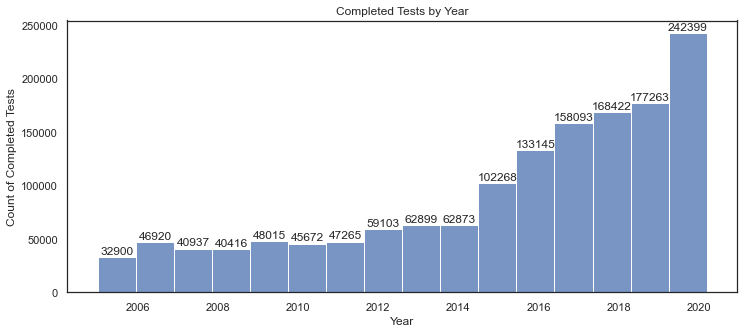

In [670]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(sex.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

### And on to Politics!!! 

In [671]:
racedf.to_csv('data/after_race.csv')

In [672]:
poldf = racedf.copy()

In [673]:
poldf.politicalid_7.count(), poldf.politicalid_7.unique(), len(poldf.politicalid_7.unique())

(1268500,
 array(['slightly conservative', nan, 'strongly liberal', 'neutral',
        'slightly liberal', 'moderately liberal', 'strongly conservative',
        'moderately conservative'], dtype=object),
 8)

In [674]:
poldf.politicalid.count(), poldf.politicalid.unique(), len(poldf.politicalid.unique())

(636054, array([nan,  6.,  7.,  5.,  4.,  3.,  2.,  1.]), 8)

In [675]:
poldf.politicalid_6.count(), poldf.politicalid_6.unique(), len(poldf.politicalid_6.unique())

(50381,
 array([nan, 'Slightly conservative', 'Slightly liberal',
        'Moderately liberal', 'Strongly libereal',
        'Moderately conservative', 'Strongly conservative'], dtype=object),
 7)

In [676]:
poldf.politicalid.replace(to_replace={1.0: "strongly conservative", 2.0: "moderately conservative", 3.0: "slightly conservative", 4.0: "neutral", 5.0: "slightly liberal", 6.0: "moderately liberal", 7.0: "strongly liberal"}, inplace=True)

In [677]:
pol_dict = {np.nan: 'Not Reported', 1.0: "strongly conservative", 2.0: "moderately conservative", 3.0: "slightly conservative", 4.0: "neutral", 5.0: "slightly liberal", 6.0: "moderately liberal", 7.0: "strongly liberal"}

In [678]:
poldf.politicalid.replace(to_replace=pol_dict, inplace=True)

In [679]:
poldf.loc[:, 'politicalid_7'].fillna(comp1.politicalid, inplace=True)

In [680]:
poldf[['politicalid_7', 'politicalid', 'politicalid_6']].to_csv('data/pol.csv')

In [681]:
poldf.drop(columns=['politicalid', 'politicalid_6'], inplace=True, axis=1)

In [682]:
poldf.politicalid_7.replace(to_replace=pol_dict, inplace=True)

In [683]:
poldf.politicalid_7.value_counts(normalize=True)

neutral                    0.259411
moderately liberal         0.216958
slightly liberal           0.111485
strongly liberal           0.104466
Not Reported               0.101941
moderately conservative    0.090132
slightly conservative      0.089939
strongly conservative      0.025668
Name: politicalid_7, dtype: float64

In [684]:
poldf.to_csv('data/poldf.csv')

### Fix Country Info

In [688]:
countrydf = poldf.copy()

In [689]:
countrydf[['countrycit_num', 'countryres_num', 'countrycit', 'countryres']].to_csv('data/country.csv')

In [690]:
countrydf.loc[:, 'countryres_num'].fillna(countrydf.countryres, inplace=True)

In [691]:
(1379189 / 1468590)

0.9391246025098905

In [694]:
# Taking top 20 countries for data, deleting rest of data in the rows for people not in these countries
# 1379189 left of 1468590 -- keeping 94% of tests by keeping top 20 countries (Not reported is the 21st, it's the second biggest country in this report :) 

country_dict = {np.nan: 'Not Reported', '': 'Not Reported',
                'US': 'U.S.A.', 
                'NaN': 'Not Reported', 
                'UK': 'U.K.', 'United Kingdom': 'U.K.', 
                'CA': 'Canada',
               'AU': 'Australia', 
               'DE': 'Germany', 
               'IN': 'India', 'NL': 'The Netherlands', 'NZ': 'New Zealand', 'SG': 'Singapore',
               'FR': 'France', 
               'CN': 'China', 'IE': 'Ireland', 'CH': 'Switzerland', 'MX': 'Mexico', 'BR': 'Brazil', 
               'ES': 'Spain', 'IT': 'Italy', 'SE': 'Sweden', 'PH': 'Phillipines', 'BE': 'Belgium'}

In [695]:
countrydf.countryres_num.replace(to_replace=country_dict, inplace=True)

In [696]:
countrydf.countryres_num.value_counts(sort=True).head(21)

U.S.A.             1051451
Not Reported        133991
U.K.                 58363
Canada               39432
Australia            27335
India                12312
Germany              12312
The Netherlands       9051
New Zealand           6710
France                6631
China                 6004
Ireland               5811
Singapore             5642
Switzerland           5401
Brazil                4281
Sweden                4201
Mexico                3997
Spain                 3740
Italy                 3539
Belgium               3056
Philippines           2247
Name: countryres_num, dtype: int64

In [697]:
top_20_countries = ['U.S.A.', 'Not Reported', 'U.K.', 'Canada', 'Australia', 'India', 'Germany', 'The Netherlands', 'New Zealand', 'France', 
                    'China', 'Ireland', 'Singapore', 'Switzerland', 'Brazil', 'Sweden', 'Mexico', 'Spain', 'Italy', 'Belgium', 'Philippines']

In [698]:
top_countrydf = countrydf[countrydf["countryres_num"].str.contains('U.S.A.|Not Reported|U.K.|Canada|Australia|India|Germany|The Netherlands|New Zealand|France|China|Ireland|Singapore|Switzerland|Brazil|Sweden|Mexico|Spain|Italy|Belgium|Philippines')==True]


In [699]:
top_countrydf.drop(top_countrydf.index[top_countrydf['countryres_num'] == 'British Indian Ocean Territory'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [701]:
top_countrydf.drop(columns=['countrycit_num', 'countryres', 'countrycit'], inplace=True)

In [702]:
top_countrydf.to_csv('data/after_country.csv')

### Fixing Age 

In [703]:
agedf = top_countrydf.copy()

In [704]:
agedf.birthyear.count()

722167

In [705]:
agedf.age.count()

547608

In [706]:
agedf['proper_age_calc'] = (agedf['year'] - agedf['birthyear']).where(agedf['birthyear'] > 150)

In [707]:
agedf.loc[:, 'age'].fillna((agedf['birthyear']).where(agedf['birthyear'] < 150), inplace=True)

In [708]:
agedf.loc[:, 'proper_age_calc'].fillna((agedf['birthyear']).where(agedf['birthyear'] < 150), inplace=True)

In [709]:
agedf[['age', 'birthyear', 'proper_age_calc']].to_csv('data/age.csv')

In [710]:
agedf.loc[:, 'age'].fillna(agedf.proper_age_calc, inplace=True)

In [711]:
agedf.drop(columns=['proper_age_calc', 'birthyear'], inplace=True)

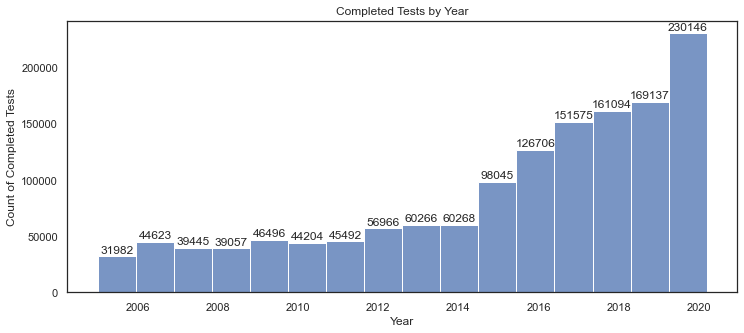

In [713]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(agedf.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [714]:
agedf.drop(columns=['MSANo', 'MSAName'], inplace=True)

In [721]:
agedf.to_csv('data/after_age.csv')

### Fixing Religion

In [720]:
rel_df = agedf.copy()

In [723]:
rel_df[['religion2009', 'religion2014', 'religionid', 'religion2009', 'religion']].to_csv('data/rel_draft.csv')

In [729]:
rel_df.drop(columns=['religion2014'], inplace=True)

### FINAL 

In [730]:
final = rel_df.copy()

In [733]:
final.drop(columns=['study_name', 'day', 'date', 'weekday', 'num', 'session_status'], inplace=True)

In [735]:
final.to_csv('data/final.csv')

In [736]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405502 entries, 0 to 92163
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1405502 non-null  float64 
 1   month             1405502 non-null  float64 
 2   year              1405502 non-null  float64 
 3   hour              1405502 non-null  float64 
 4   Implicit Measure  1381834 non-null  float64 
 5   assocareer        1305069 non-null  object  
 6   assofamily        1303776 non-null  object  
 7   impcareer         1309862 non-null  category
 8   impfamily         1309354 non-null  category
 9   anninc            1125944 non-null  object  
 10  percentanninc     1169334 non-null  object  
 11  countryres_num    1405502 non-null  object  
 12  edu_14            1267562 non-null  float64 
 13  politicalid_7     1405502 non-null  object  
 14  STATE             951922 non-null   object  
 15  CountyNo          951922 non-null 

In [737]:
final['Implicit Measure'].max(), final['Implicit Measure'].min(), final['Implicit Measure'].mean()

(1.834496894436833, -1.9234420591846053, 0.358638028522985)

In [964]:
fin_1['Implicit Measure'].max(), fin_1['Implicit Measure'].min(), fin_1['Implicit Measure'].mean()

(1.834496894436833, -1.9234420591846053, 0.358638028522985)

In [954]:
fin_1 = final.copy()

In [956]:
fin_1.dropna(subset = ["Implicit Measure"], inplace=True)


In [965]:
fin_1 = fin_1.astype({"year": int})

In [966]:
fin_1.to_csv('data/fin_1.csv')

In [967]:
fin_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381834 entries, 0 to 92163
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1381834 non-null  float64 
 1   month             1381834 non-null  float64 
 2   year              1381834 non-null  int64   
 3   hour              1381834 non-null  float64 
 4   Implicit Measure  1381834 non-null  float64 
 5   assocareer        1284634 non-null  object  
 6   assofamily        1283381 non-null  object  
 7   impcareer         1289377 non-null  category
 8   impfamily         1288900 non-null  category
 9   anninc            1111587 non-null  object  
 10  percentanninc     1154133 non-null  object  
 11  countryres_num    1381834 non-null  object  
 12  edu_14            1248084 non-null  float64 
 13  politicalid_7     1381834 non-null  object  
 14  STATE             937169 non-null   object  
 15  CountyNo          937169 non-null 

In [1035]:
fin_1.countryres_num.value_counts()

U.S.A.             1035242
Not Reported        129821
U.K.                 57644
Canada               38819
Australia            26857
Germany              12172
India                11996
The Netherlands       8949
New Zealand           6620
France                6527
China                 5891
Ireland               5727
Singapore             5523
Switzerland           5331
Brazil                4193
Sweden                4143
Mexico                3934
Spain                 3712
Italy                 3490
Belgium               3028
Philippines           2215
Name: countryres_num, dtype: int64

### Create likert scale value columns for scaled columns (list below)
col_cat for categorical, col_int for integer scale

Scale Columns = ['assocareer', 'assofamily', 'impcareer', 'impfamily', 'edu_14', 'politicalid_7', 'religionid']


In [852]:
assocareer_dict = {"Not Reported": np.nan, "Strongly female": 1, "Moderately female": 2, "Slightly female": 3, "Neither male nor female": 4, "Slightly male": 5, "Moderately male": 6, "Strongly male": 7}
assofamily_dict = {"Not Reported": np.nan, "Strongly female": 1, "Moderately female": 2, "Slightly female": 3, "Neither male nor female": 4, "Slightly male": 5, "Moderately male": 6, "Strongly male": 7}

In [853]:
impcareer_dict = {"Not Reported": np.nan, "Not at all important": 1, "Slightly important": 2, "Somewhat important": 3, "Very important": 4, "Extremely important": 5}
impfamily_dict = {"Not Reported": np.nan, "Not at all important": 1, "Slightly important": 2, "Somewhat important": 3, "Very important": 4, "Extremely important": 5}

In [854]:
edu_dict = {"elementary": 1, "junior high": 2, 
            "some high school": 3, "high school graduate": 4, 
            "some college": 5, "associates degree": 6, 
            "bachelors degree": 7, "some graduate school": 8, "master's degree": 9, 
            "J.D.": 10, "M.D.": 11, "Ph.D.": 12, "other advanced degree": 13, "Not Reported": np.nan}


In [855]:
rel_dict2 = {"Not Reported": np.nan, "not at all religious": 1, "slightly religious": 2, "moderately religious": 3, "strongly religious": 4}

In [856]:
pol_dict2 = {"Not Reported": np.nan, "strongly conservative": 1, "moderately conservative": 2, "slightly conservative": 3, "neutral": 4, "slightly liberal": 5, "moderately liberal": 6, "strongly liberal": 7}

### Some viz

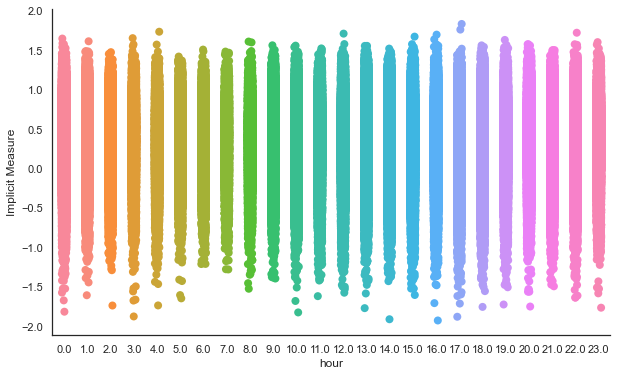

In [921]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x = "hour",
              y = "Implicit Measure",
              data = fin_df_3,
              ax = ax,
              s = 8)
sns.despine(right = True)
plt.show()

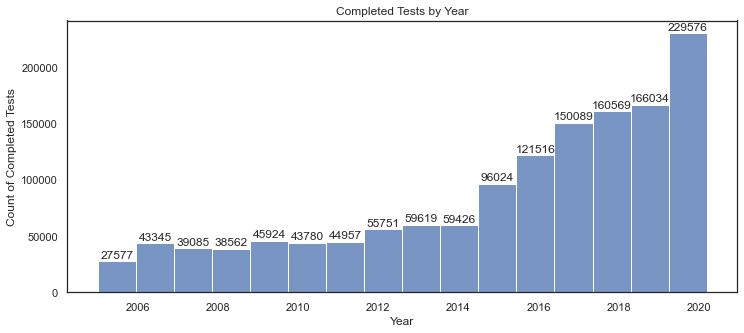

In [922]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(fin_df_3.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

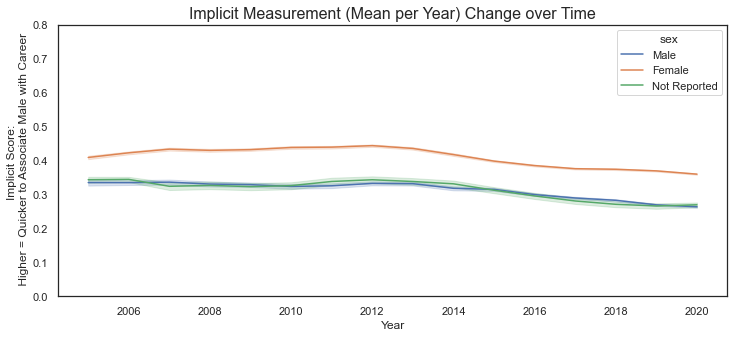

In [923]:
plt.figure(figsize=(12, 5))

ax = sns.lineplot(x= 'year', y= 'Implicit Measure', data=fin_df_3, hue='sex')
ax.set_title('Implicit Measurement (Mean per Year) Change over Time', fontsize=16)
ax.set_ylabel('Implicit Score: \n Higher = Quicker to Associate Male with Career')
ax.set_xlabel('Year')
ax.set(ylim=(0, 0.8));


''

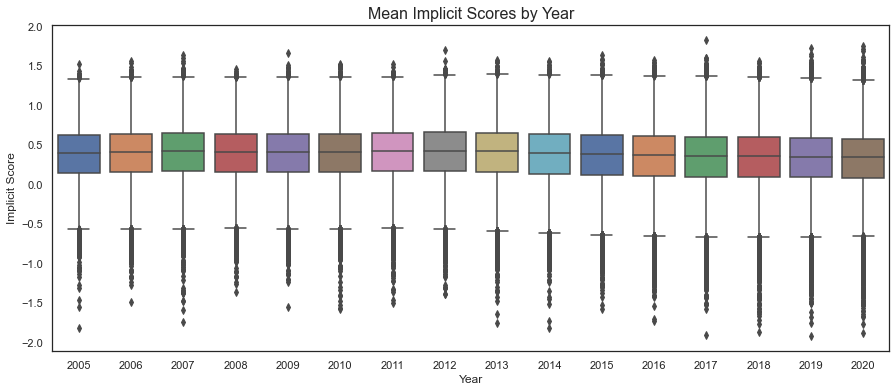

In [924]:
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.boxplot(x= 'year', y="Implicit Measure", data=fin_df_3, palette='deep')
ax.set_title('Mean Implicit Scores by Year', fontsize=16)
ax.set_ylabel('Implicit Score')
# show_values_on_bars(ax)
ax.set_xlabel('Year')
# plt.setp(ax.get_xticklabels())
# plt.setp(ax.get_yticklabels())

;

In [925]:
nobs = fin_df_3.groupby(['sex'])['session_id'].agg(['count'])
nobs = ["n: " + str(i) for s in nobs.values for i in s]

''

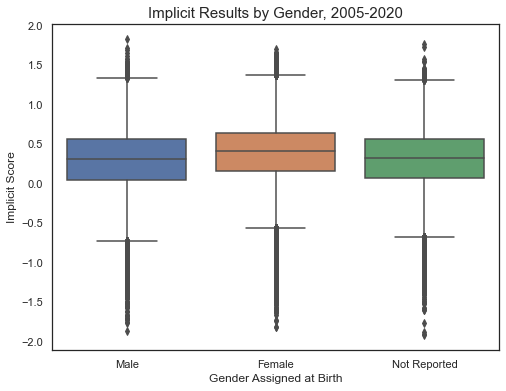

In [926]:
plt.figure(figsize=(8, 6))

ax = sns.boxplot(x= 'sex', y= 'Implicit Measure', data=fin_df_3, palette='deep')
ax.set_title('Implicit Results by Gender, 2005-2020', fontsize=15)
ax.set_ylabel('Implicit Score')
ax.set_xlabel('Gender Assigned at Birth')
plt.show
;


''

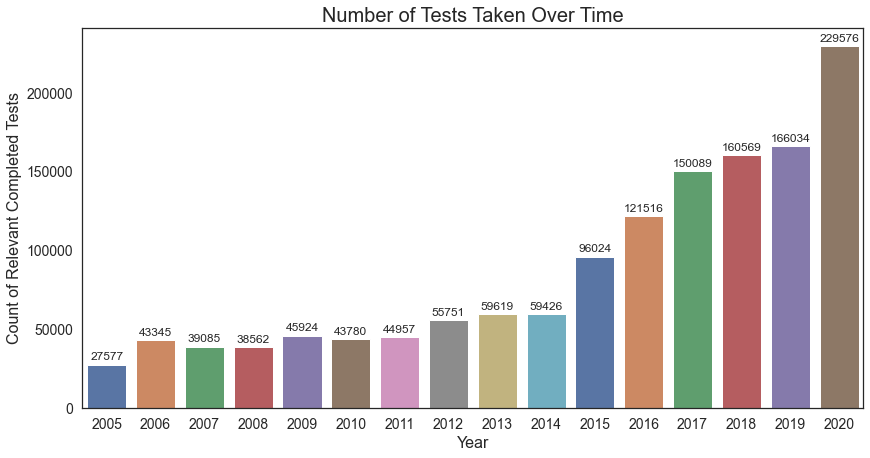

In [927]:
plt.figure(figsize=(14,7))

ax = sns.countplot(x= 'year', data=fin_df_3, palette='deep')
ax.set_title('Number of Tests Taken Over Time',fontsize=20)
ax.set_ylabel('Count of Relevant Completed Tests', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)
show_values_on_bars(ax)
;


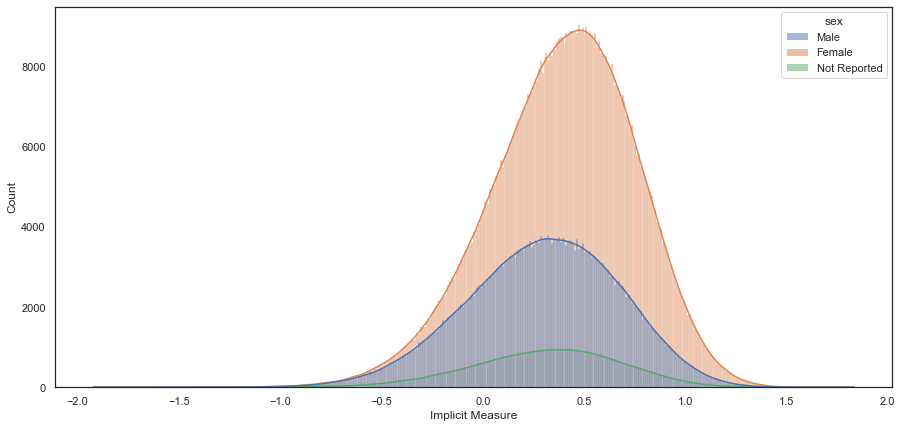

In [928]:
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(data=fin_df_3, x='Implicit Measure', hue='sex', stat='count', kde=True, palette='deep');

# I want to animate this one so badly year over year... 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


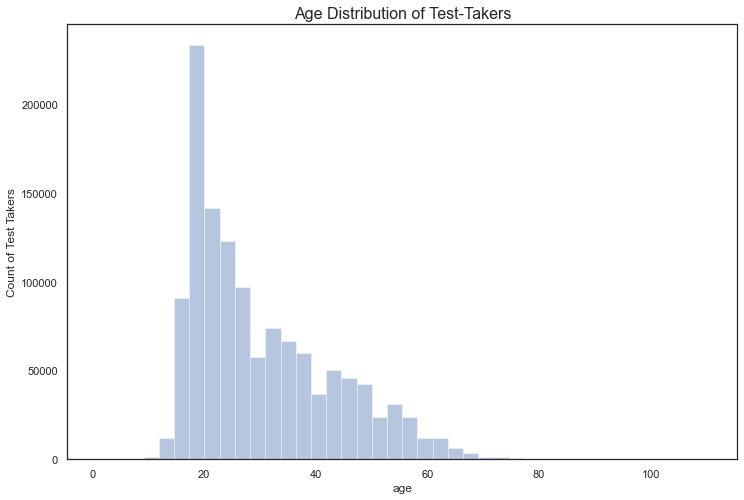

In [929]:
# source = https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python

fig, ax = plt.subplots(figsize=(15,7))
fig.set_size_inches(12, 8)
sns.distplot(fin_df_3['age'], bins=40, kde=False)
plt.title("Age Distribution of Test-Takers", fontsize=16)
plt.ylabel("Count of Test Takers");

### Correlations

In [962]:
fin_1['assocareer_int'] = fin_1['assocareer'].replace(to_replace=assocareer_dict)

In [963]:
fin_1['religionid_int'] = fin_1['religionid'].replace(to_replace=rel_dict2)

In [976]:
fin_1['political_int'] = fin_1['politicalid_7'].replace(to_replace=pol_dict2)

In [970]:
fin_1['edu_int'] = fin_1['edu_14'].replace(to_replace=edu_dict)

In [971]:
fin_1['impfamily_int'] = fin_1['impfamily'].replace(to_replace=impfamily_dict)

In [972]:
fin_1['impcareer_int'] = fin_1['impcareer'].replace(to_replace=impcareer_dict)

In [973]:
fin_1['assofamily_int'] = fin_1['assofamily'].replace(to_replace=assofamily_dict)

In [980]:
fin_1.to_csv('data/fin_1.csv')

In [981]:
corrs = fin_1[['Implicit Measure', 'assocareer_int', 'assofamily_int', 'edu_int', 'political_int', 'age', 'religionid_int']].corr()
corrs

,Implicit Measure,assocareer_int,assofamily_int,edu_int,political_int,age,religionid_int
Implicit Measure,1.000000,0.091394,-0.128544,0.012144,-0.052991,0.044469,0.057037
assocareer_int,0.091394,1.000000,-0.003889,0.022867,-0.109238,0.003989,0.068525
assofamily_int,-0.128544,-0.003889,1.000000,0.010689,-0.000400,0.041476,-0.041923
edu_int,0.012144,0.022867,0.010689,1.000000,0.132392,0.534390,-0.067107
political_int,-0.052991,-0.109238,-0.000400,0.132392,1.000000,0.017930,-0.371063
age,0.044469,0.003989,0.041476,0.534390,0.017930,1.000000,-0.006657
religionid_int,0.057037,0.068525,-0.041923,-0.067107,-0.371063,-0.006657,1.000000


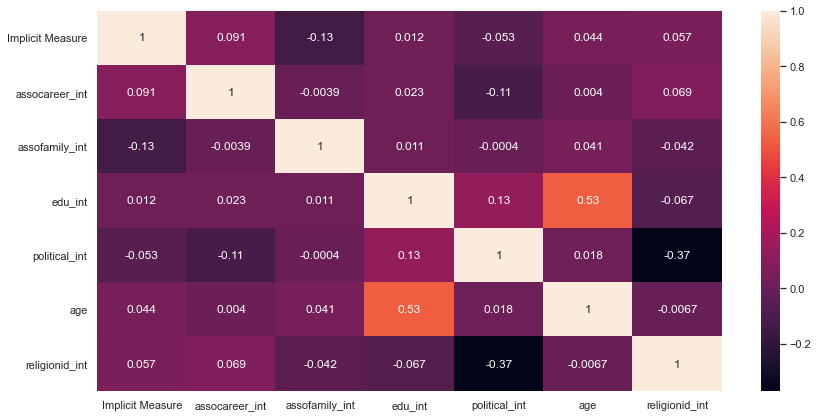

In [982]:
plt.figure(figsize=(14,7))

sns.heatmap(corrs, annot=True, fmt='.2g')
plt.show();

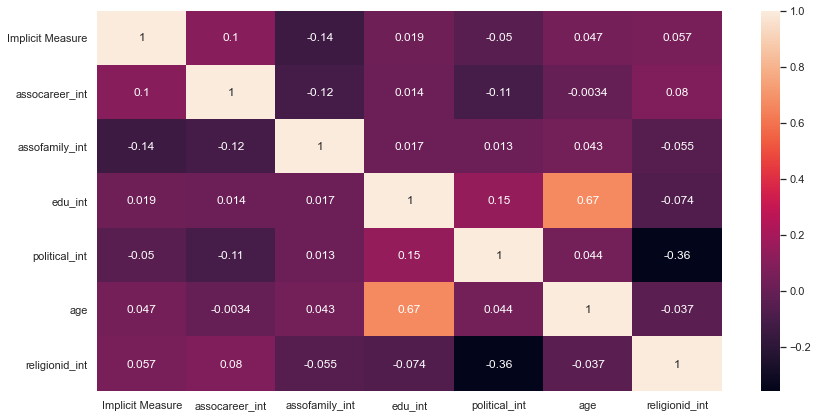

In [985]:
plt.figure(figsize=(14,7))

corr_s = fin_1[['Implicit Measure', 'assocareer_int', 'assofamily_int', 'edu_int', 'political_int', 'age', 'religionid_int']].corr(method = 'spearman')

sns.heatmap(corr_s, annot = True, fmt='.2g')

plt.show();

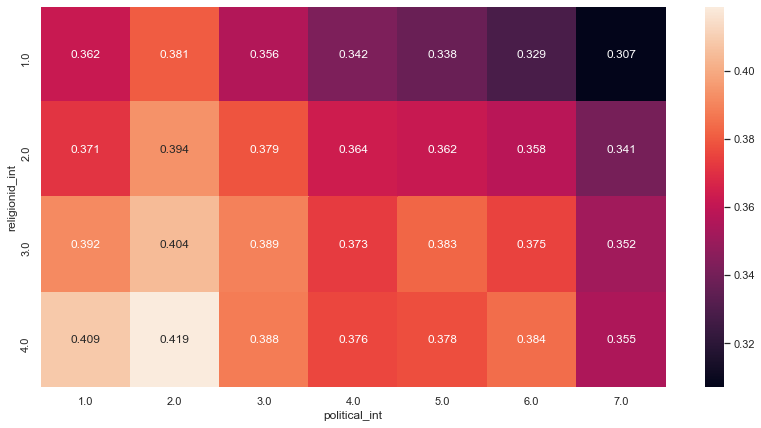

In [987]:
plt.figure(figsize=(14,7))

df_piv = fin_1.pivot_table(index='religionid_int', columns='political_int', values='Implicit Measure', aggfunc=np.mean)
sns.heatmap(df_piv, annot=True, fmt='.3f')

plt.show();

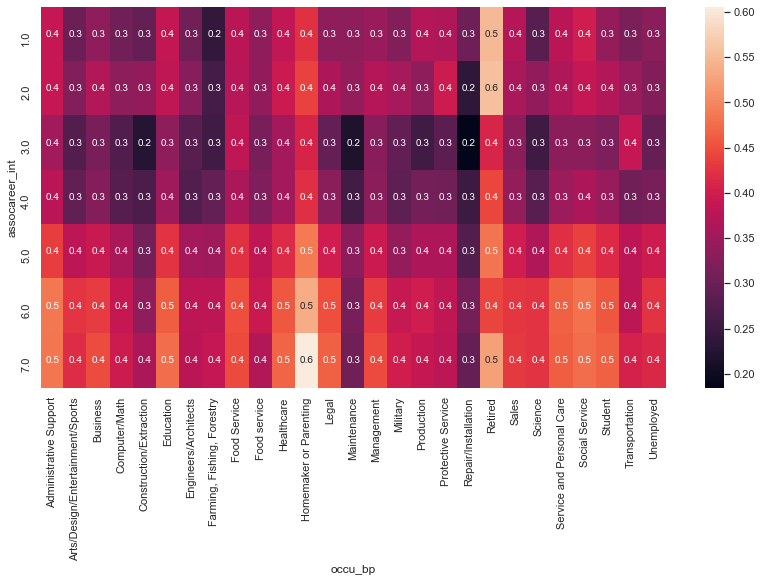

In [1031]:
plt.figure(figsize=(14,7))

df_piv = fin_1.pivot_table(index='assocareer_int', columns='occu_bp', values='Implicit Measure', aggfunc=np.mean)
sns.heatmap(df_piv, annot=True, fmt='.1f')

plt.show();

In [1032]:
assocareer_dict

{'Not Reported': nan,
 'Strongly female': 1,
 'Moderately female': 2,
 'Slightly female': 3,
 'Neither male nor female': 4,
 'Slightly male': 5,
 'Moderately male': 6,
 'Strongly male': 7}

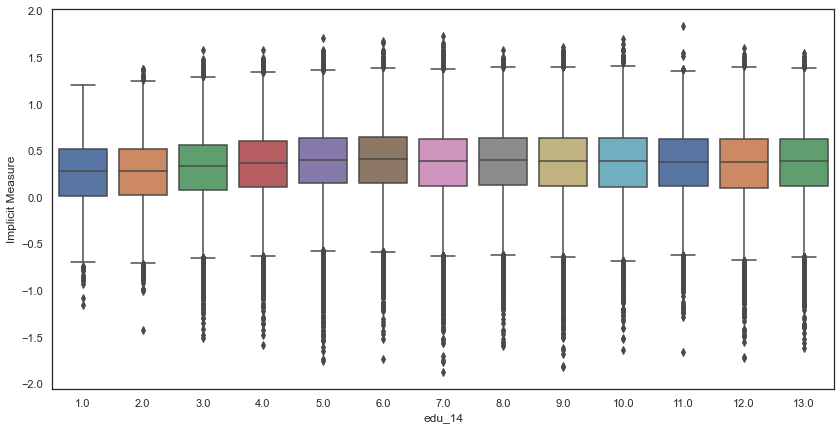

In [989]:
plt.figure(figsize=(14,7))
sns.boxplot(x="edu_14", y="Implicit Measure", data=fin_1, palette='deep');

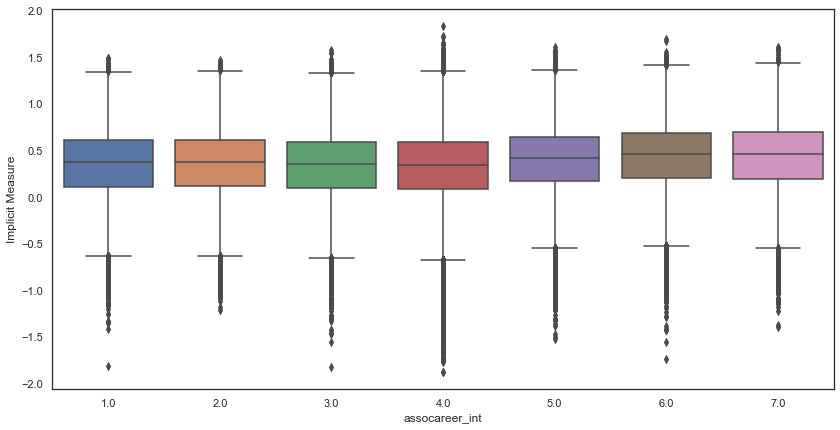

In [992]:
plt.figure(figsize=(14,7))
sns.boxplot(x="assocareer_int", y="Implicit Measure", data=fin_1);

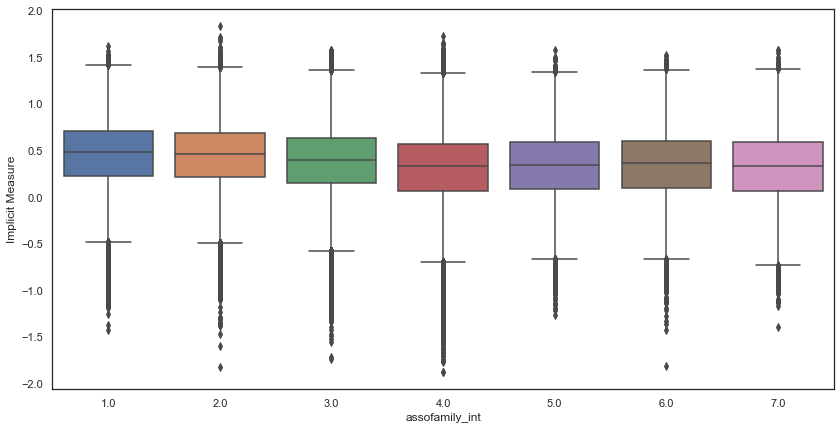

In [993]:
plt.figure(figsize=(14,7))
sns.boxplot(x="assofamily_int", y="Implicit Measure", data=fin_1);

In [994]:
fin_1.age.value_counts()

20.0     81192
21.0     79842
19.0     79267
18.0     73100
22.0     61851
         ...  
99.0         1
97.0         1
94.0         1
2.0          1
103.0        1
Name: age, Length: 105, dtype: int64

In [995]:
fin_1['age_groups'] = pd.cut(x=fin_1['age'], bins=[0, 18, 30, 50, 75, 105], ordered=True)

''

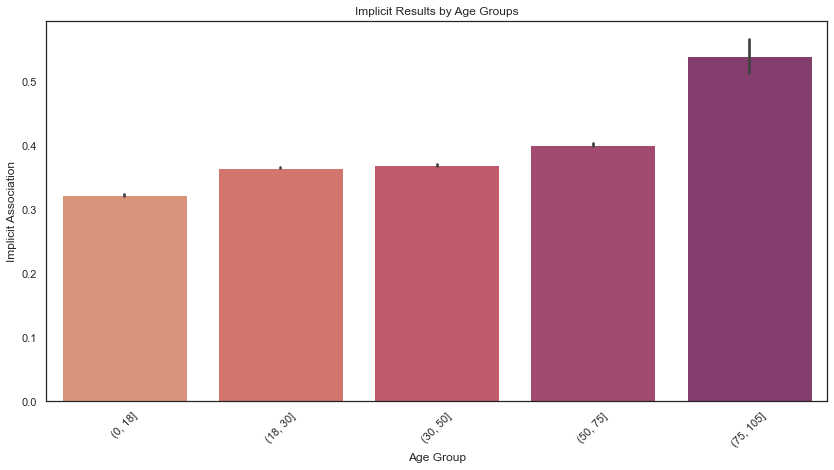

In [996]:
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'age_groups', y= 'Implicit Measure', data=fin_1, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Age Groups')
ax.set_ylabel('Implicit Association')
ax.set_xlabel('Age Group')
plt.xticks(rotation=45)
;

In [997]:
fin_1.anninc.unique()

array(['$200,000+', nan, '$160,001 - $180,000', '$80,001 - $100,000',
       '$40,001 - $60,000', '$20,001 - $40,000', '0 - $20,000',
       '$180,001 - $200,000', '$120,001 - $140,000', '$60,001 - $80,000',
       '$140,001 - $160,000', '$100,001 - $120,000'], dtype=object)

''

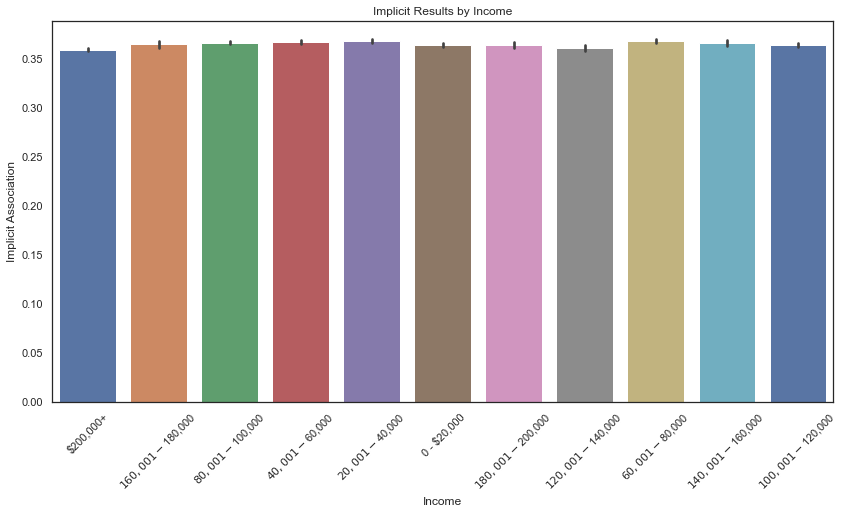

In [999]:
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'anninc', y= 'Implicit Measure', data=fin_1, palette=sns.color_palette('deep'))
ax.set_title('Implicit Results by Income')
ax.set_ylabel('Implicit Association')
ax.set_xlabel('Income')
plt.xticks(rotation=45)
;

#How do I get these in order??

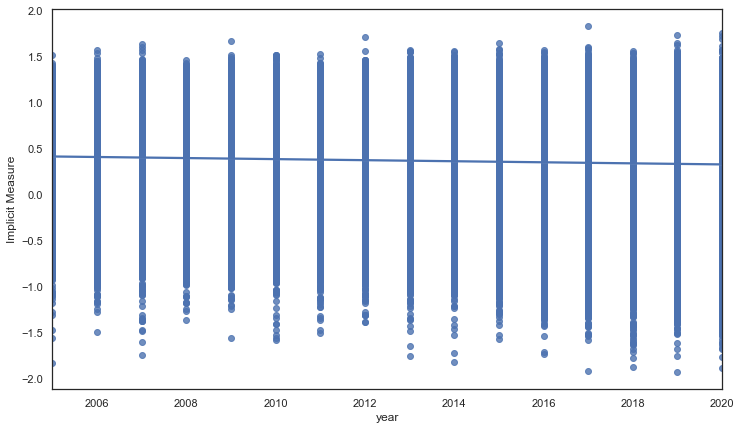

In [1000]:
plt.figure(figsize=(12,7))
ax = sns.regplot(x=fin_1['year'], y=fin_1['Implicit Measure'])
plt.show()

In [1001]:
import matplotlib.animation as animation
import matplotlib

In [278]:
def animate(i):
    data = fin_1['Implicit Measure'].groupby['State']
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [ ]:
# ani = animation.FuncAnimation(fig, animate, frames=17, repeat=True)
# plt.show();

In [ ]:
# sns.pairplot(finaldf, hue='sex')
# plt.show();

In [1016]:
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [1008]:
states_df = fin_1[['Implicit Measure', 'year', 'STATE', 'sex']]

In [1009]:
states_df.to_csv('data/states.csv')

In [1014]:
states = gpd.read_file('data/states.csv')


In [1020]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1381834 entries, 0 to 1381833
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   field_1           1381834 non-null  object  
 1   Implicit Measure  1381834 non-null  object  
 2   year              1381834 non-null  object  
 3   STATE             1381834 non-null  object  
 4   sex               1381834 non-null  object  
 5   geometry          0 non-null        geometry
dtypes: geometry(1), object(5)
memory usage: 63.3+ MB


In [1025]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Subsets the GeoDataFrame
usa = world[world.name == "United States of America"]

<AxesSubplot:>

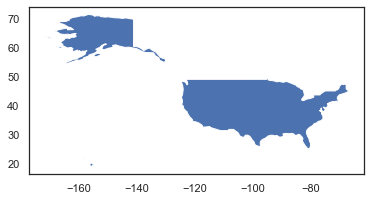

In [1028]:
usa.plot()

In [1036]:
usa_df = fin_1.copy()

In [1037]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381834 entries, 0 to 92163
Data columns (total 30 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1381834 non-null  float64 
 1   month             1381834 non-null  float64 
 2   year              1381834 non-null  int64   
 3   hour              1381834 non-null  float64 
 4   Implicit Measure  1381834 non-null  float64 
 5   assocareer        1284634 non-null  object  
 6   assofamily        1283381 non-null  object  
 7   impcareer         1289377 non-null  category
 8   impfamily         1288900 non-null  category
 9   anninc            1111587 non-null  object  
 10  percentanninc     1154133 non-null  object  
 11  countryres_num    1381834 non-null  object  
 12  edu_14            1248084 non-null  float64 
 13  politicalid_7     1381834 non-null  object  
 14  STATE             937169 non-null   object  
 15  CountyNo          937169 non-null 

In [1038]:
usa_df = usa_df[['session_id', 'year', 'Implicit Measure', 'assocareer', 'anninc', 'edu_14', 'politicalid_7', 'STATE', 'religionid', 'age', 'sex', 'raceomb', 'occu_bp', 'assocareer_int', 'religionid_int', 'edu_int', 'political_int', 'age_groups']]

In [1042]:
usa_df = usa_df.rename(columns={"Implicit Measure": "Implicit_Score", "assocareer": "Explicit_Reported"})

In [1062]:
wages_women = [0.823, 0.816, 0.817, 0.805, 0.805, 0.796, 0.786, 0.776, 0.783, 0.765, 0.770, 0.769, 0.770, 0.771, 0.778, 0.769]
wage_gap_pct = wages_women[::-1]
wage_gap_pct

[0.769,
 0.778,
 0.771,
 0.77,
 0.769,
 0.77,
 0.765,
 0.783,
 0.776,
 0.786,
 0.796,
 0.805,
 0.805,
 0.817,
 0.816,
 0.823]

In [1063]:
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

# source = https://www.census.gov/newsroom/stories/equal-pay-day.html

In [1064]:
len(years), len(wage_gap_pct)

(16, 16)

In [1065]:
d = {'year':years,'PctPay':wage_gap_pct}
wage_gap_df = pd.DataFrame(d)

In [1067]:
wage_gap_df.head(16)

,year,PctPay
0,2005,0.769
1,2006,0.778
2,2007,0.771
3,2008,0.770
4,2009,0.769
5,2010,0.770
6,2011,0.765
7,2012,0.783
8,2013,0.776
9,2014,0.786


In [1068]:
wage_gap_df.to_csv('data/wage_gap.csv')

In [1051]:
#source - https://www.pay-equity.org/info-time.html

In [1072]:
imp_by_year = usa_df.groupby(by='year').mean('Implicit_Score')

In [1080]:
df_wage_imp = wage_gap_df.join(imp_by_year, on='year')

In [1082]:
df_wage_imp.drop(columns='wage_pct', inplace=True)

In [1083]:
df_wage_imp

,year,PctPay,session_id,Implicit_Score,edu_14,age,assocareer_int,religionid_int,edu_int,political_int
0,2005,0.769,2.218036e+06,0.379665,6.186432,27.387251,3.458463,NaN,6.186432,3.862193
1,2006,0.778,4.260082e+06,0.388688,6.321681,27.957246,3.885737,2.707640,6.321681,4.082384
2,2007,0.771,6.536210e+06,0.398849,6.250095,27.750216,4.758894,2.717408,6.250095,4.448478
3,2008,0.770,8.799826e+06,0.394767,6.300366,27.273632,4.744273,2.699642,6.300366,4.512101
4,2009,0.769,1.113193e+07,0.393935,6.236171,27.539154,4.744550,2.528845,6.236171,4.415784
5,2010,0.770,1.340166e+07,0.397712,6.135949,27.171367,4.757671,2.509927,6.135949,4.291526
6,2011,0.765,1.532429e+07,0.401566,6.296140,27.600959,4.748217,2.492412,6.296140,4.293020
7,2012,0.783,1.751035e+07,0.405373,6.449390,28.373597,4.738466,2.449202,6.449390,4.384477
8,2013,0.776,1.972730e+07,0.396384,6.707576,29.113930,4.710264,2.416327,6.707576,4.487250
9,2014,0.786,2.171030e+09,0.381478,6.768159,29.196305,4.669597,2.431601,6.768159,4.444958


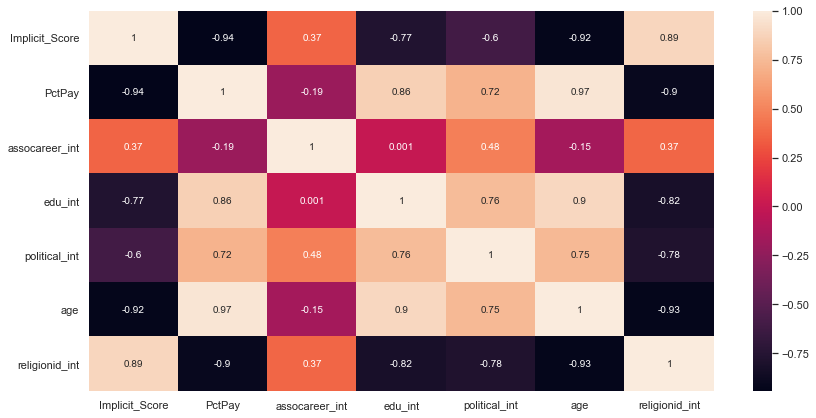

In [1087]:
plt.figure(figsize=(14,7))

corr_pct = df_wage_imp[['Implicit_Score', 'PctPay', 'assocareer_int', 'edu_int', 'political_int', 'age', 'religionid_int']].corr()

sns.heatmap(corr_pct, annot = True, fmt='.2g')

plt.show();

''

<Figure size 1008x504 with 0 Axes>

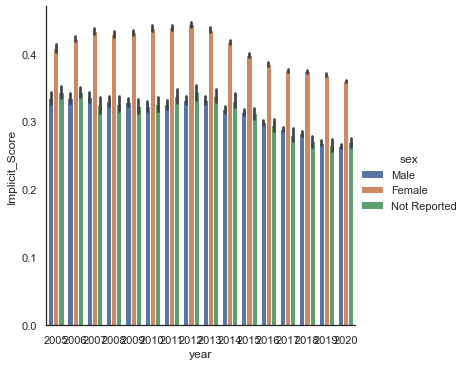

In [1111]:
plt.figure(figsize=(14,7))

ax = sns.catplot(data=usa_df, kind="bar", x="year", y="Implicit_Score", hue="sex")
# ax.set_title('Implicit Results by Year and Gender at Birth')
# ax.set_ylabel('Implicit_Score')
# ax.set_xlabel('Year')
# ax.xticks(rotation=45)
;

# Why can't I get this graph to work??? 